In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.10.0'

# Download dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [6]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

# Preparing data

In [7]:
# plt.figure(figsize=(5, 5))
# plt.imshow(x_train[10])
# plt.colorbar()
# plt.grid(False)
# plt.show()

In [8]:
x_train = x_train / 255.
x_test = x_test / 255.

In [9]:
# fig = plt.figure(figsize=(10, 10))
# fig.suptitle('Clothes', fontsize=20)
# for i in range(25):
#   plt.subplot(5, 5, i+1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(x_train[i], cmap=plt.cm.binary)
#   plt.xlabel(class_names[y_train[i]])
# plt.show()

# Create Model

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5036 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3796 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3399 - accuracy: 0.8755
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3150 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2980 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2826 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9025
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.242

# Evaluate model

In [13]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3452 - accuracy: 0.8788 - 398ms/epoch - 1ms/step

Test accuracy: 0.8787999749183655


# Prediction

In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 772us/step


In [16]:
predictions[0]

array([1.3593671e-09, 5.9176991e-12, 1.2738974e-10, 8.4173094e-12,
       4.5501550e-11, 1.2893677e-03, 2.1753304e-09, 3.6510697e-04,
       5.4371285e-10, 9.9834549e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
y_test[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

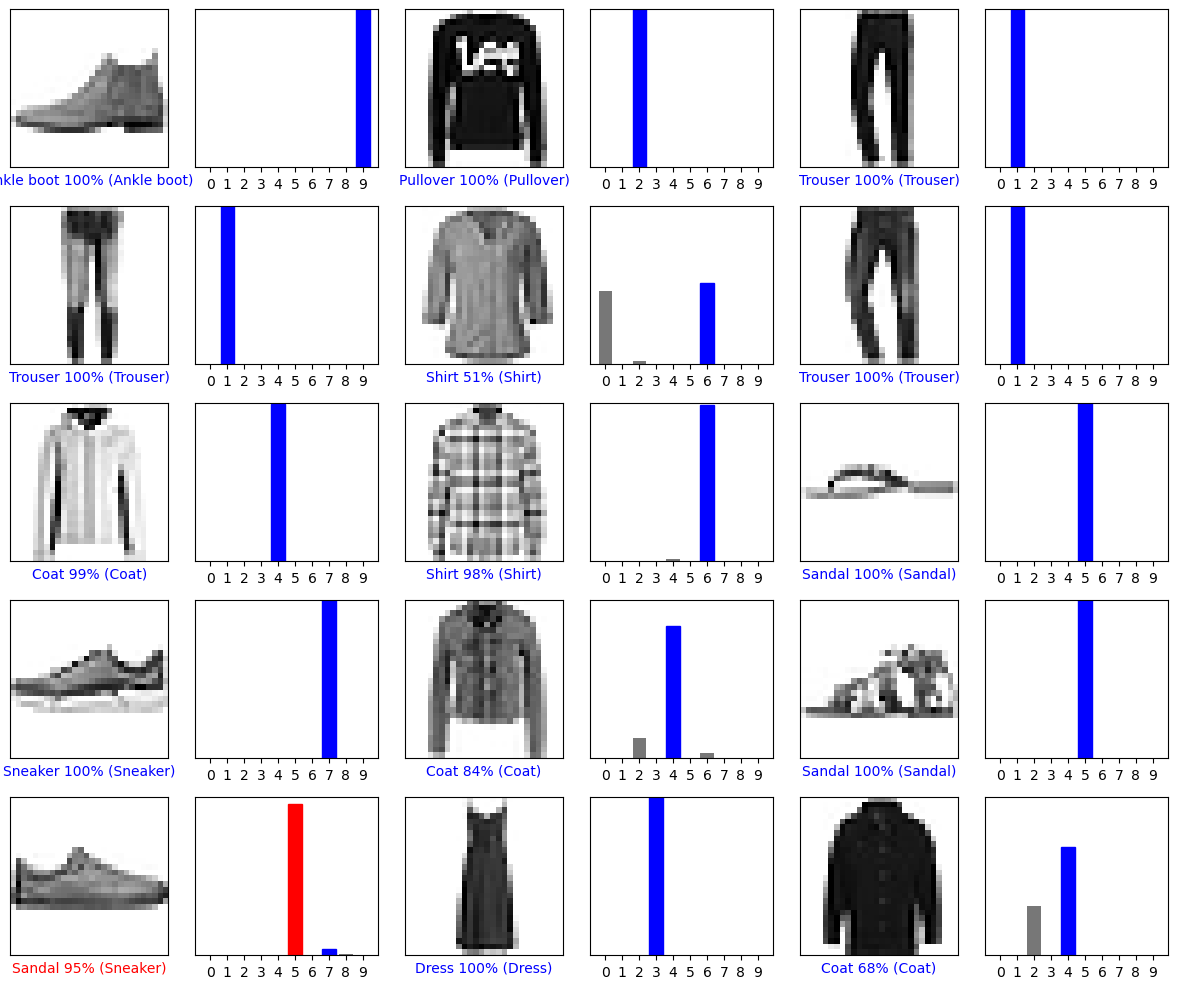

In [20]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# Use model

In [21]:
img = x_test[1]

print(img.shape)

(28, 28)


In [22]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 18ms/step
[[2.8327162e-05 3.4689032e-14 9.9935621e-01 6.9815775e-10 4.7917335e-04
  1.5500944e-10 1.3631742e-04 6.7245803e-16 8.3810328e-12 1.2811328e-18]]


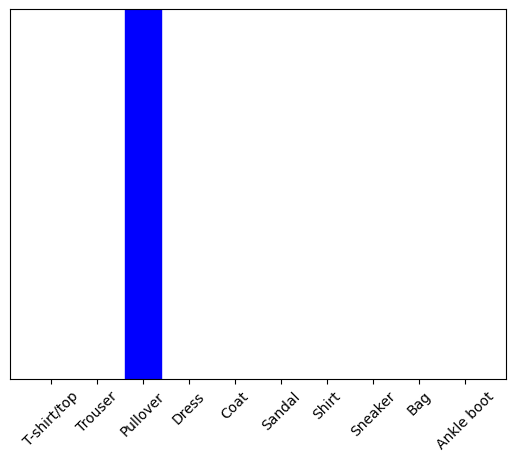

In [24]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [25]:
np.argmax(predictions_single[0])

2